# Language trends aggregated over Europe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pop_dir = '../../data/population/'
basedir = '../../data/eurobarometer/'
step2_dir = basedir + "step2/"

## Load and clean up population data

In [3]:
data = pd.read_csv(pop_dir + 'demo_pjangroup__custom_1879586_page_tabular.tsv', sep='\t', na_values=[': ', ':'])
data.head()

,"freq,unit,sex,age,geo\TIME_PERIOD",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"A,NR,T,TOTAL,AD",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78115,76246.0,NaN,NaN,NaN,NaN,NaN,76177,NaN,NaN
1,"A,NR,T,TOTAL,AL",1583800.0,1633800.0,1685800.0,1736838.0,1788404.0,1839866.0,1889715.0,1939430.0,1991765.0,...,2903008,2897770.0,2892394,2885796,2875592,2876591,2870324,2862427,2845955,2829741
2,"A,NR,T,TOTAL,AM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3274285,NaN,NaN,3010598,2998577,2986151,2972732,2965269,2959694,2963251
3,"A,NR,T,TOTAL,AT",7030385.0,7064693.0,7107904.0,7151824.0,7199798.0,7247804.0,7293973.0,7350159.0,7403837.0,...,8408121,8451860.0,8507786,8584926,8700471,8772865,8822267,8858775,8901064,8932664
4,"A,NR,T,TOTAL,AZ",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9235085,9356483.0,9477119,9593038,9705643,9809981,9898085,9981457,10067108,10119133


In [4]:
data.iloc[:, 0] = data.iloc[:, 0].apply(lambda x: x.split(',')[-1])
data = data.rename({'freq,unit,sex,age,geo\TIME_PERIOD': 'Country'}, axis=1).set_index('Country')
data = data.replace("[^0-9.]", "", regex=True)
data = data.apply(pd.to_numeric)
data.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78115.0,76246.0,NaN,NaN,NaN,NaN,NaN,76177.0,NaN,NaN
AL,1583800.0,1633800.0,1685800.0,1736838.0,1788404.0,1839866.0,1889715.0,1939430.0,1991765.0,2052778.0,...,2903008.0,2897770.0,2892394.0,2885796.0,2875592.0,2876591.0,2870324.0,2862427.0,2845955.0,2829741.0
AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3274285.0,NaN,NaN,3010598.0,2998577.0,2986151.0,2972732.0,2965269.0,2959694.0,2963251.0
AT,7030385.0,7064693.0,7107904.0,7151824.0,7199798.0,7247804.0,7293973.0,7350159.0,7403837.0,7426968.0,...,8408121.0,8451860.0,8507786.0,8584926.0,8700471.0,8772865.0,8822267.0,8858775.0,8901064.0,8932664.0
AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9235085.0,9356483.0,9477119.0,9593038.0,9705643.0,9809981.0,9898085.0,9981457.0,10067108.0,10119133.0


## Prepare language and population datasets for joining

In [5]:
ldata = pd.read_csv(basedir + step2_dir + 'eval_df_wide.csv').set_index(['Country', 'Year'])
ldata.head()

L1_Danish  L1_German  L1_French  L1_Italian  L1_Dutch  \
Country Year                                                          
AT      1995   0.004985   0.977069   0.002991    0.000997  0.000000   
        1998   0.000959   0.948226   0.001918    0.002876  0.000000   
        1999   0.004912   0.967583   0.000000    0.000000  0.001965   
        2000   0.006122   0.952041   0.007143    0.002041  0.000000   
        2001   0.001932   0.964251   0.002899    0.000000  0.000966   

              L1_English  L1_Spanish  L1_Portuguese  L1_Greek  L1_Other  ...  \
Country Year                                                             ...   
AT      1995    0.000997    0.000000            0.0  0.000997  0.010967  ...   
        1998    0.007670    0.001918            0.0  0.001918  0.032598  ...   
        1999    0.004912    0.000982            0.0  0.000982  0.016699  ...   
        2000    0.013265    0.000000            0.0  0.005102  0.028571  ...   
        2001    0.002899    0.000966            0.0  0.000966  0.024155  ...   

              L2_Polish  L2_Romanian  L2_Slovak  L2_Slovenian  L1_Galician  \
Country Year                                                                 
AT      1995        0.0          0.0        0.0           0.0          0.0   
        1998        0.0          0.0        0.0           0.0          0.0   
        1999        0.0          0.0        0.0           0.0          0.0   
        2000        0.0          0.0        0.0           0.0          0.0   
        2001        0.0          0.0        0.0           0.0          0.0   

              L1_Hindi  L1_Urdu  L2_Galician  L2_Hindi  L2_Urdu  
Country Year                                                     
AT      1995       0.0      0.0          0.0       0.0      0.0  
        1998       0.0      0.0          0.0       0.0      0.0  
        1999       0.0      0.0          0.0       0.0      0.0  
        2000       0.0      0.0          0.0       0.0      0.0  
        2001       0.0      0.0          0.0       0.0      0.0  

[5 rows x 74 columns]

In [6]:
# Find countries that appear in the language data that we don't have population data for
ldata_c = set(ldata.reset_index().Country)
popdata_c = set(data.reset_index().Country)
ldata_c - popdata_c

{'CY-TCC', 'DE-E', 'DE-W', 'GB-GBN', 'GB-NIR', 'GR'}

In [7]:
# List countries that we do have population data for s.t. we can extrapolate population data for the "missing" countries 
l = list(popdata_c)
l.sort()
" ".join(l)

'AD AL AM AT AZ BA BE BG BY CH CY CZ DE DE_TOT DK EA18 EA19 EE EEA30_2007 EEA31 EFTA EL ES EU27_2007 EU27_2020 EU28 FI FR FX GE HR HU IE IS IT LI LT LU LV MC MD ME MK MT NL NO PL PT RO RS RU SE SI SK SM TR UA UK XK'

Greece doesn't appear in the population data under any obvious code -> drop it. We don't have data for Northern Cyprus, but for Cyprus as a whole -> use that.

In [8]:
ldata = ldata.drop('GR')
ldata = ldata.rename(index={'CY-TCC': 'CY'})

The language data distringuishes between East and West Germany, as well as well as between Great Britain and Northern Ireland while the population data doesn't -> combine the two. 

In [9]:
def combine_countries(ldata, country1, country2, new_name):
    tot = (ldata.loc[country1] + ldata.loc[country2])/2
    tot['Country'] = new_name
    tot = tot.reset_index().set_index(['Country', 'Year'])
    display(tot)
    ldata = ldata.drop([country1, country2, new_name], errors='ignore')
    ldata = ldata.append(tot).sort_index()
    return ldata

In [10]:
ldata = combine_countries(ldata, 'DE-E', 'DE-W', 'DE')

L1_Danish  L1_German  L1_French  L1_Italian  L1_Dutch  \
Country Year                                                          
DE      1990   0.007457   1.000000   0.002476    0.001497  0.000000   
        1994   0.007535   0.959079   0.001880    0.004229  0.000000   
        1995   0.002718   0.973412   0.007222    0.002244  0.000898   
        1998   0.000000   0.979773   0.000493    0.002959  0.000493   
        1999   0.001964   0.977412   0.002455    0.001473  0.000000   
        2000   0.003940   0.965831   0.003485    0.001970  0.000985   
        2001   0.007202   0.973994   0.001925    0.011579  0.000483   
        2005   0.000247   0.944321   0.002947    0.002452  0.001463   
        2012   0.000482   0.919388   0.003372    0.002408  0.001445   

              L1_English  L1_Spanish  L1_Portuguese  L1_Greek  L1_Other  ...  \
Country Year                                                             ...   
DE      1990    0.009924    0.001996       0.000499  0.000998  0.010848  ...   
        1994    0.002820    0.004229       0.000940  0.004229  0.015059  ...   
        1995    0.001355    0.002252       0.000449  0.002244  0.003607  ...   
        1998    0.001479    0.001479       0.000000  0.003453  0.002467  ...   
        1999    0.001964    0.002456       0.000000  0.001965  0.009819  ...   
        2000    0.015335    0.001470       0.000000  0.001485  0.010320  ...   
        2001    0.001442    0.000483       0.000966  0.000476  0.001449  ...   
        2005    0.001958    0.001236       0.000000  0.001710  0.006656  ...   
        2012    0.013506    0.000963       0.000963  0.000482  0.014507  ...   

              L2_Polish  L2_Romanian  L2_Slovak  L2_Slovenian  L1_Galician  \
Country Year                                                                 
DE      1990   0.000000     0.000000   0.000000      0.000000          0.0   
        1994   0.000000     0.000000   0.000000      0.000000          0.0   
        1995   0.000000     0.000000   0.000000      0.000000          0.0   
        1998   0.000000     0.000000   0.000000      0.000000          0.0   
        1999   0.000000     0.000000   0.000000      0.000000          0.0   
        2000   0.000000     0.000000   0.000000      0.000000          0.0   
        2001   0.000000     0.000000   0.000000      0.000000          0.0   
        2005   0.008469     0.002205   0.000495      0.000742          0.0   
        2012   0.008717     0.003372   0.000973      0.000000          0.0   

              L1_Hindi  L1_Urdu  L2_Galician  L2_Hindi  L2_Urdu  
Country Year                                                     
DE      1990       0.0      0.0          0.0       0.0      0.0  
        1994       0.0      0.0          0.0       0.0      0.0  
        1995       0.0      0.0          0.0       0.0      0.0  
        1998       0.0      0.0          0.0       0.0      0.0  
        1999       0.0      0.0          0.0       0.0      0.0  
        2000       0.0      0.0          0.0       0.0      0.0  
        2001       0.0      0.0          0.0       0.0      0.0  
        2005       0.0      0.0          0.0       0.0      0.0  
        2012       0.0      0.0          0.0       0.0      0.0  

[9 rows x 74 columns]

In [11]:
ldata = combine_countries(ldata, 'GB-GBN', 'GB-NIR', 'UK')

L1_Danish  L1_German  L1_French  L1_Italian  L1_Dutch  \
Country Year                                                          
UK      1987   0.000000   0.000000   0.001550    0.000000  0.000000   
        1990   0.007987   0.001433   0.005895    0.001910  0.000000   
        1994   0.000469   0.003508   0.001874    0.001874  0.000000   
        1995   0.000000   0.003327   0.001426    0.000000  0.002852   
        1998   0.000000   0.003998   0.002469    0.000940  0.000940   
        1999   0.000499   0.000000   0.003060    0.000499  0.000998   
        2000   0.000000   0.000948   0.000948    0.000948  0.002545   
        2001   0.000485   0.002067   0.000970    0.000970  0.000970   
        2005   0.000000   0.002527   0.002433    0.001703  0.000487   
        2012   0.002568   0.006613   0.006016    0.001478  0.006717   

              L1_English  L1_Spanish  L1_Portuguese  L1_Greek  L1_Other  ...  \
Country Year                                                             ...   
UK      1987    0.996901    0.001033       0.000517  0.000517  0.006715  ...   
        1990    0.995208    0.003672       0.001597  0.000478  0.013388  ...   
        1994    0.955328    0.000469       0.000000  0.001406  0.035072  ...   
        1995    0.980076    0.004240       0.000000  0.000000  0.007605  ...   
        1998    0.976609    0.001999       0.000940  0.000470  0.008108  ...   
        1999    0.973422    0.001497       0.000998  0.001497  0.015535  ...   
        2000    0.956292    0.000948       0.000474  0.002370  0.022749  ...   
        2001    0.972715    0.000970       0.000485  0.000000  0.019399  ...   
        2005    0.955211    0.002284       0.000973  0.000973  0.025735  ...   
        2012    0.907659    0.001970       0.002463  0.000493  0.025228  ...   

              L2_Polish  L2_Romanian  L2_Slovak  L2_Slovenian  L1_Galician  \
Country Year                                                                 
UK      1987    0.00000     0.000000   0.000000      0.000000     0.000000   
        1990    0.00000     0.000000   0.000000      0.000000     0.000000   
        1994    0.00000     0.000000   0.000000      0.000000     0.000000   
        1995    0.00000     0.000000   0.000000      0.000000     0.000000   
        1998    0.00000     0.000000   0.000000      0.000000     0.000000   
        1999    0.00000     0.000000   0.000000      0.000000     0.000000   
        2000    0.00000     0.000000   0.000000      0.000000     0.000000   
        2001    0.00000     0.000000   0.000000      0.000000     0.000000   
        2005    0.00204     0.000243   0.000000      0.000000     0.000000   
        2012    0.00415     0.002075   0.001582      0.000493     0.000493   

              L1_Hindi   L1_Urdu  L2_Galician  L2_Hindi   L2_Urdu  
Country Year                                                       
UK      1987  0.000000  0.000000     0.000000  0.000000  0.000000  
        1990  0.000000  0.000000     0.000000  0.000000  0.000000  
        1994  0.000000  0.000000     0.000000  0.000000  0.000000  
        1995  0.000000  0.000000     0.000000  0.000000  0.000000  
        1998  0.000000  0.000000     0.000000  0.000000  0.000000  
        1999  0.000000  0.000000     0.000000  0.000000  0.000000  
        2000  0.000000  0.000000     0.000000  0.000000  0.000000  
        2001  0.000000  0.000000     0.000000  0.000000  0.000000  
        2005  0.000487  0.001217     0.000824  0.003406  0.002676  
        2012  0.001970  0.004926     0.000000  0.008374  0.006897  

[10 rows x 74 columns]

For Germany, we have population data coded as 'DE' and 'DE_TOT'. Rename them so we will use the data for unified Germany as opposed to BRD for the language data.

In [12]:
data.loc[['DE', 'DE_TOT']]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
DE,55257088.0,55958321.0,56589148.0,57247246.0,57864509.0,58587451.0,59296591.0,59792934.0,59948474.0,60463033.0,...,80327900.0,80523746.0,80767463.0,81197537.0,82175684.0,82521653.0,82792351.0,83019213.0,83166711.0,83155031.0
DE_TOT,72542990.0,73086809.0,73668454.0,74383113.0,75045592.0,75591082.0,76336308.0,76864314.0,77038358.0,77550269.0,...,80327900.0,80523746.0,80767463.0,81197537.0,82175684.0,82521653.0,82792351.0,83019213.0,83166711.0,83155031.0


In [13]:
data = data.rename(index={'DE': 'BRD', 'DE_TOT': 'DE'})

Interpolate missing data for easier handling later.

In [14]:
data = data.interpolate(method = 'linear', limit_direction = 'both', axis=1)
data.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
AD,44593.0,44593.0,44593.0,44593.0,44593.0,44593.0,44593.0,44593.0,44593.0,44593.0,...,78115.0,7.624600e+04,7.623450e+04,76223.0,76211.5,76200.0,76188.5,76177.0,76177.0,76177.0
AL,1583800.0,1633800.0,1685800.0,1736838.0,1788404.0,1839866.0,1889715.0,1939430.0,1991765.0,2052778.0,...,2903008.0,2.897770e+06,2.892394e+06,2885796.0,2875592.0,2876591.0,2870324.0,2862427.0,2845955.0,2829741.0
AM,3226900.0,3226900.0,3226900.0,3226900.0,3226900.0,3226900.0,3226900.0,3226900.0,3226900.0,3226900.0,...,3274285.0,3.186389e+06,3.098494e+06,3010598.0,2998577.0,2986151.0,2972732.0,2965269.0,2959694.0,2963251.0
AT,7030385.0,7064693.0,7107904.0,7151824.0,7199798.0,7247804.0,7293973.0,7350159.0,7403837.0,7426968.0,...,8408121.0,8.451860e+06,8.507786e+06,8584926.0,8700471.0,8772865.0,8822267.0,8858775.0,8901064.0,8932664.0
AZ,8016200.0,8016200.0,8016200.0,8016200.0,8016200.0,8016200.0,8016200.0,8016200.0,8016200.0,8016200.0,...,9235085.0,9.356483e+06,9.477119e+06,9593038.0,9705643.0,9809981.0,9898085.0,9981457.0,10067108.0,10119133.0


## Join language and population datasets

Bring population data into long form for easy joining.

In [15]:
pop_data_l = pd.melt(data.reset_index(), id_vars='Country', var_name='Year', value_name='pop')
pop_data_l['Year'] = pop_data_l['Year'].astype('int64')
pop_data_l = pop_data_l.set_index(['Country', 'Year'])
pop_data_l.head()

,,pop
Country,Year,
AD,1960,44593.0
AL,1960,1583800.0
AM,1960,3226900.0
AT,1960,7030385.0
AZ,1960,8016200.0


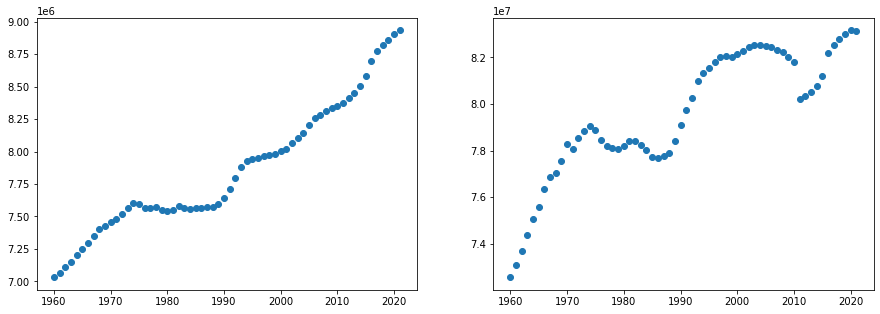

In [16]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
s = pop_data_l.loc['AT']
axes[0].scatter(s.index, s.values)
s = pop_data_l.loc['DE']
axes[1].scatter(s.index, s.values)

Match language and population data per country and year.

In [17]:
ldata = ldata.join(pop_data_l)
ldata.head()

L1_Danish  L1_German  L1_French  L1_Italian  L1_Dutch  \
Country Year                                                          
AT      1995   0.004985   0.977069   0.002991    0.000997  0.000000   
        1998   0.000959   0.948226   0.001918    0.002876  0.000000   
        1999   0.004912   0.967583   0.000000    0.000000  0.001965   
        2000   0.006122   0.952041   0.007143    0.002041  0.000000   
        2001   0.001932   0.964251   0.002899    0.000000  0.000966   

              L1_English  L1_Spanish  L1_Portuguese  L1_Greek  L1_Other  ...  \
Country Year                                                             ...   
AT      1995    0.000997    0.000000            0.0  0.000997  0.010967  ...   
        1998    0.007670    0.001918            0.0  0.001918  0.032598  ...   
        1999    0.004912    0.000982            0.0  0.000982  0.016699  ...   
        2000    0.013265    0.000000            0.0  0.005102  0.028571  ...   
        2001    0.002899    0.000966            0.0  0.000966  0.024155  ...   

              L2_Romanian  L2_Slovak  L2_Slovenian  L1_Galician  L1_Hindi  \
Country Year                                                                
AT      1995          0.0        0.0           0.0          0.0       0.0   
        1998          0.0        0.0           0.0          0.0       0.0   
        1999          0.0        0.0           0.0          0.0       0.0   
        2000          0.0        0.0           0.0          0.0       0.0   
        2001          0.0        0.0           0.0          0.0       0.0   

              L1_Urdu  L2_Galician  L2_Hindi  L2_Urdu        pop  
Country Year                                                      
AT      1995      0.0          0.0       0.0      0.0  7943489.0  
        1998      0.0          0.0       0.0      0.0  7971116.0  
        1999      0.0          0.0       0.0      0.0  7982461.0  
        2000      0.0          0.0       0.0      0.0  8002186.0  
        2001      0.0          0.0       0.0      0.0  8020946.0  

[5 rows x 75 columns]

Multiply the fractions of each language in a country for a given year with the corresponding population numbers to get an estimate of absolute speaker numbers. Interpolate missing data over a maximum of two consecutive points in time.

In [18]:
abs_speakers = ldata.apply(lambda x: x * ldata['pop']).drop('pop', axis=1)
abs_speakers = abs_speakers.astype(int)
abs_speakers = abs_speakers.replace(0, np.NaN).groupby('Country').apply(lambda x: x.interpolate(method = 'linear', limit_direction = 'both', limit=2))
abs_speakers

L1_Danish  L1_German  L1_French  L1_Italian  L1_Dutch  \
Country Year                                                          
AT      1995    39598.0  7761335.0    23759.0      7919.0   15682.0   
        1998     7642.0  7558421.0    15284.0     22927.0   15682.0   
        1999    39206.0  7723697.0    36221.0     19628.5   15682.0   
        2000    48992.0  7618407.0    57158.0     16330.0   11715.5   
        2001    15499.0  7734206.0    23249.0     12263.5    7749.0   
...                 ...        ...        ...         ...       ...   
UK      1999    29231.0   144589.0   179224.0     29231.0   58462.0   
        2000    28921.5    55720.0    55720.0     55720.0  149626.0   
        2001    28612.0   121966.0    57225.0     57225.0   57225.0   
        2005    95817.5   152073.0   146428.0    102499.0   29285.0   
        2012   163023.0   419882.0   381972.0     93835.0  426514.0   

              L1_English  L1_Spanish  L1_Portuguese  L1_Greek   L1_Other  ...  \
Country Year                                                              ...   
AT      1995      7919.0     15284.0            NaN    7919.0    87117.0  ...   
        1998     61139.0     15284.0            NaN   15284.0   259844.0  ...   
        1999     39206.0      7841.0            NaN    7841.0   133302.0  ...   
        2000    106151.0      7795.0         4098.0   40827.0   228633.0  ...   
        2001     23249.0      7749.0         4098.0    7749.0   193742.0  ...   
...                  ...         ...            ...       ...        ...  ...   
UK      1999  57022748.0     87694.0        58462.0   87694.0   910009.0  ...   
        2000  56215867.0     55720.0        27860.0  139301.0  1337294.0  ...   
        2001  57389943.0     57225.0        28612.0   98936.0  1144515.0  ...   
        2005  57486538.0    137430.0        58571.0   58571.0  1548787.0  ...   
        2012  57631878.0    125113.0       156391.0   31278.0  1601828.0  ...   

              L2_Polish  L2_Romanian  L2_Slovak  L2_Slovenian  L1_Galician  \
Country Year                                                                 
AT      1995        NaN          NaN        NaN           NaN          NaN   
        1998        NaN          NaN        NaN           NaN          NaN   
        1999        NaN          NaN        NaN           NaN          NaN   
        2000    24591.0      20493.0    16394.0      110663.0          NaN   
        2001    24591.0      20493.0    16394.0      110663.0       8155.0   
...                 ...          ...        ...           ...          ...   
UK      1999        NaN          NaN        NaN           NaN          NaN   
        2000   122787.0      14642.0        NaN           NaN          NaN   
        2001   122787.0      14642.0   100466.0       31278.0      31278.0   
        2005   122787.0      14642.0   100466.0       31278.0      31278.0   
        2012   263490.0     131745.0   100466.0       31278.0      31278.0   

              L1_Hindi   L1_Urdu  L2_Galician  L2_Hindi   L2_Urdu  
Country Year                                                       
AT      1995       NaN       NaN          NaN       NaN       NaN  
        1998       NaN       NaN          NaN       NaN       NaN  
        1999       NaN       NaN          NaN       NaN       NaN  
        2000       NaN       NaN          NaN       NaN       NaN  
        2001    8155.0       NaN          NaN       NaN       NaN  
...                ...       ...          ...       ...       ...  
UK      1999       NaN       NaN          NaN       NaN       NaN  
        2000   29285.0   73214.0      49573.0  204999.0  161071.0  
        2001   29285.0   73214.0      49573.0  204999.0  161071.0  
        2005   29285.0   73214.0      49573.0  204999.0  161071.0  
        2012  125113.0  312783.0      49573.0  531732.0  437897.0  

[157 rows x 74 columns]

## Plots

Bring data into long form for plotting.

In [19]:
x = abs_speakers.reset_index().reset_index().rename({'index': 'id'}, axis=1)
x = pd.wide_to_long(x, stubnames=['L1','L2'], i='id',j='Language', sep='_', suffix='.*')
x = x.reset_index().set_index(['Country', 'Language'])
x = x.loc[x.groupby(['Country', 'Language']).size() > 2]
x = x.reset_index().drop('id', axis=1)

agg_long = x
agg_long = agg_long.replace(0, np.NaN)
agg_long.head()

,Country,Language,Year,L1,L2
0,AT,Arabic,1995,7642.0,23759.0
1,AT,Basque,1995,NaN,NaN
2,AT,Bulgarian,1995,NaN,NaN
3,AT,Catalan,1995,NaN,NaN
4,AT,Chinese,1995,7642.0,7642.0


In [20]:
sns.set_style('darkgrid')
pal = sns.color_palette() + sns.color_palette('pastel') + sns.color_palette('dark') + sns.color_palette("Set2")

### Absolute number of speakers by country over time

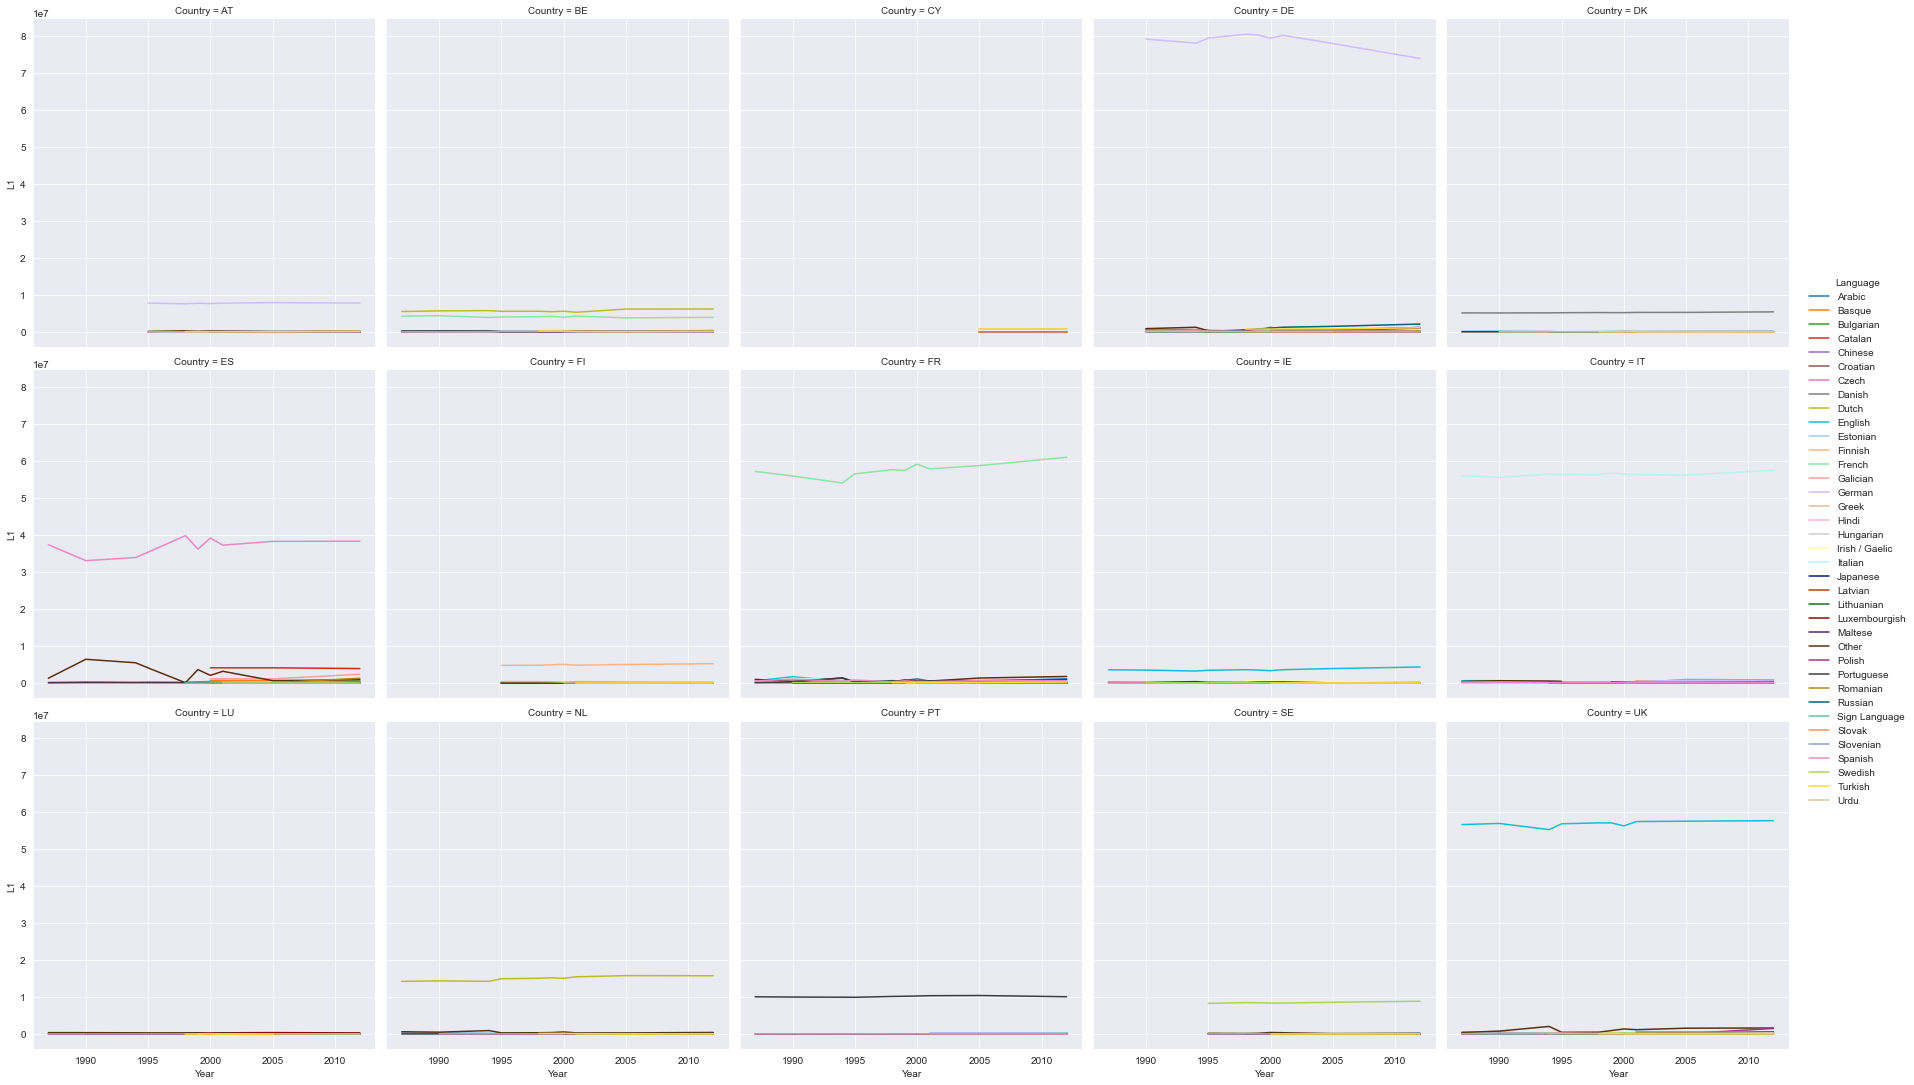

In [21]:
sns.relplot(
    data=agg_long,
    x="Year", y="L1",
    hue="Language", col='Country', col_wrap=5,
    kind="line", palette=pal[:len(agg_long.Language.unique())]
)

### Absolute number of speaker over time - aggegrated

Sum up number of speakers of a language over all countries. Take only languages for which we have a decent amount of data points.

In [22]:
agg = agg_long.groupby(['Language', 'Year']).sum()
agg = agg.replace(0, np.NaN)

s = agg.reset_index().groupby('Language').count().L1
ls = s[s > 5].index
print(list(ls))
agg = agg.loc[ls]
agg = agg.reset_index()
agg

['Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Finnish', 'French', 'German', 'Greek', 'Irish / Gaelic', 'Italian', 'Japanese', 'Luxembourgish', 'Other', 'Portuguese', 'Russian', 'Spanish', 'Swedish', 'Turkish']


,Language,Year,L1,L2
0,Arabic,1987,NaN,NaN
1,Arabic,1990,5.723190e+05,7.076450e+05
2,Arabic,1994,6.124620e+05,7.076450e+05
3,Arabic,1995,7.114540e+05,7.489490e+05
4,Arabic,1998,6.201512e+05,1.001985e+06
...,...,...,...,...
185,Turkish,1999,1.254961e+06,7.690200e+05
186,Turkish,2000,1.274356e+06,7.980820e+05
187,Turkish,2001,1.191620e+06,7.067135e+05
188,Turkish,2005,2.566699e+06,6.270020e+05


#### ---> L1

<AxesSubplot:xlabel='Year', ylabel='L1'>

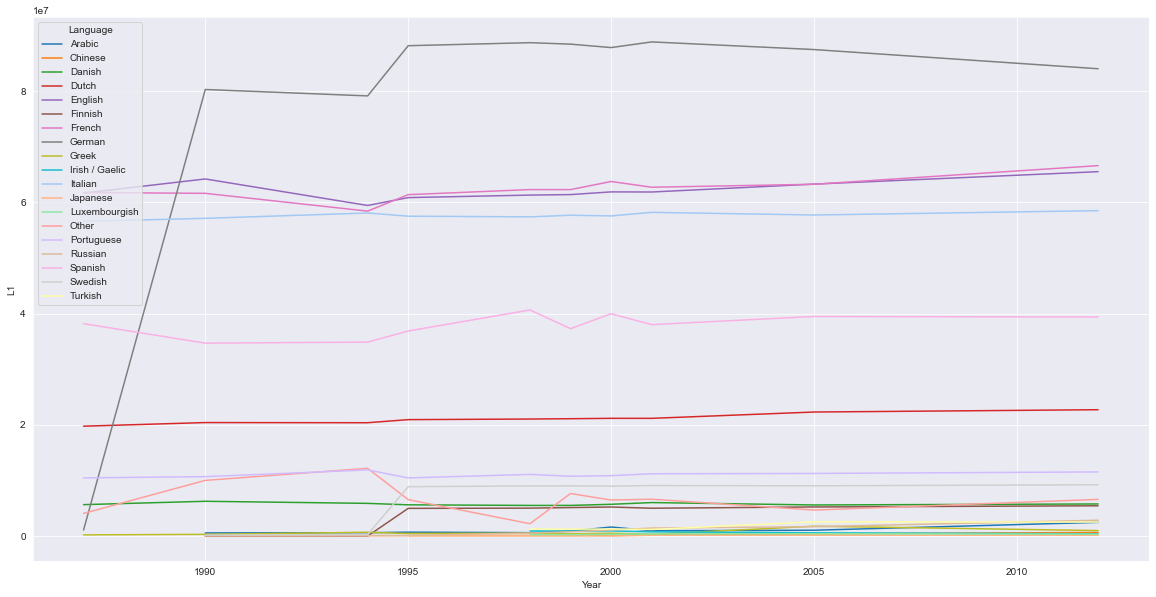

In [23]:
plt.figure(figsize=(20,10))
sns.lineplot(
    data=agg,
    x="Year", y="L1",
    hue="Language",
    palette=pal[:len(agg.Language.unique())]
)

Regarding the jumps for German:
* 1990: Reunification of Germany, start of language data for Germany.
* 1995: Austria joins the EU, start of language data for Austria.

#### ---> L2

<AxesSubplot:xlabel='Year', ylabel='L2'>

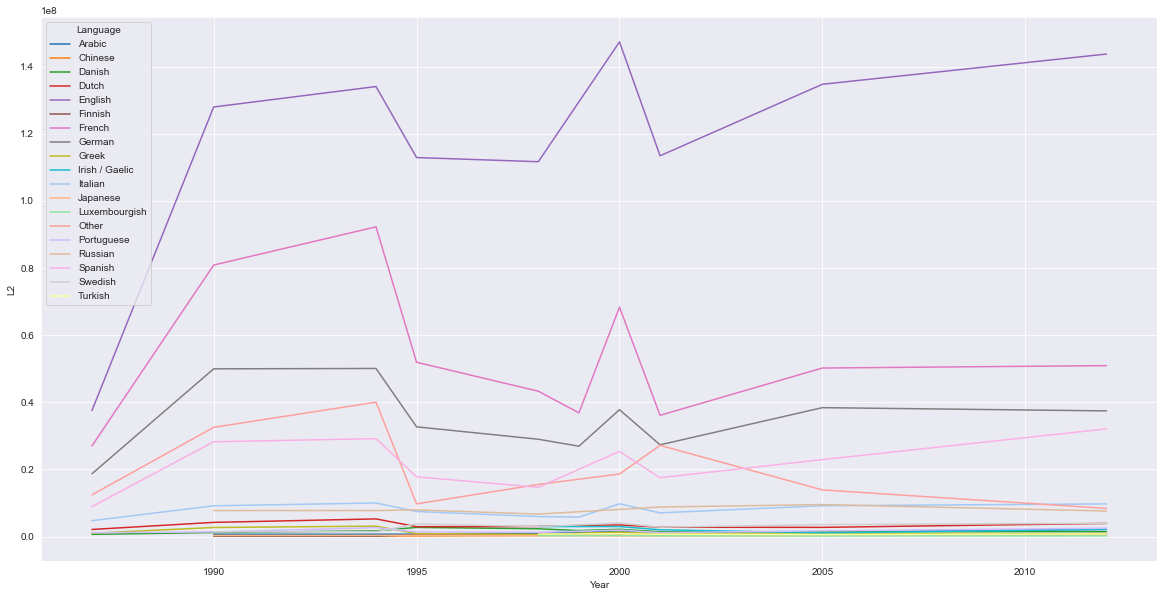

In [24]:
plt.figure(figsize=(20,10))
sns.lineplot(
    data=agg,
    x="Year", y="L2",
    hue="Language",
    palette=pal[:len(agg.Language.unique())]
)

### Relative number of speaker over time - aggegrated

Divide absolute speaker numbers by maximum for each language in order to normalise to [0,1] and get an idea of trends and how fast a language is growing/shrinking in comparison.

In [25]:
def normalise(agg, key):
    other = 'L2' if key == 'L1' else 'L1'
    max_per_lang = agg.groupby('Language').max()[key].to_frame().reset_index().rename({key: 'Max'}, axis=1)
    m = pd.merge(agg, max_per_lang, on='Language').drop(other, axis=1).set_index(['Language', 'Year'])
    m = m.apply(lambda x: x / m['Max']).drop('Max', axis=1).reset_index()
    return m

In [26]:
m = normalise(agg, 'L1')
m

,Language,Year,L1
0,Arabic,1987,NaN
1,Arabic,1990,0.231218
2,Arabic,1994,0.247436
3,Arabic,1995,0.287428
4,Arabic,1998,0.250542
...,...,...,...
185,Turkish,1999,0.488940
186,Turkish,2000,0.496496
187,Turkish,2001,0.464262
188,Turkish,2005,1.000000


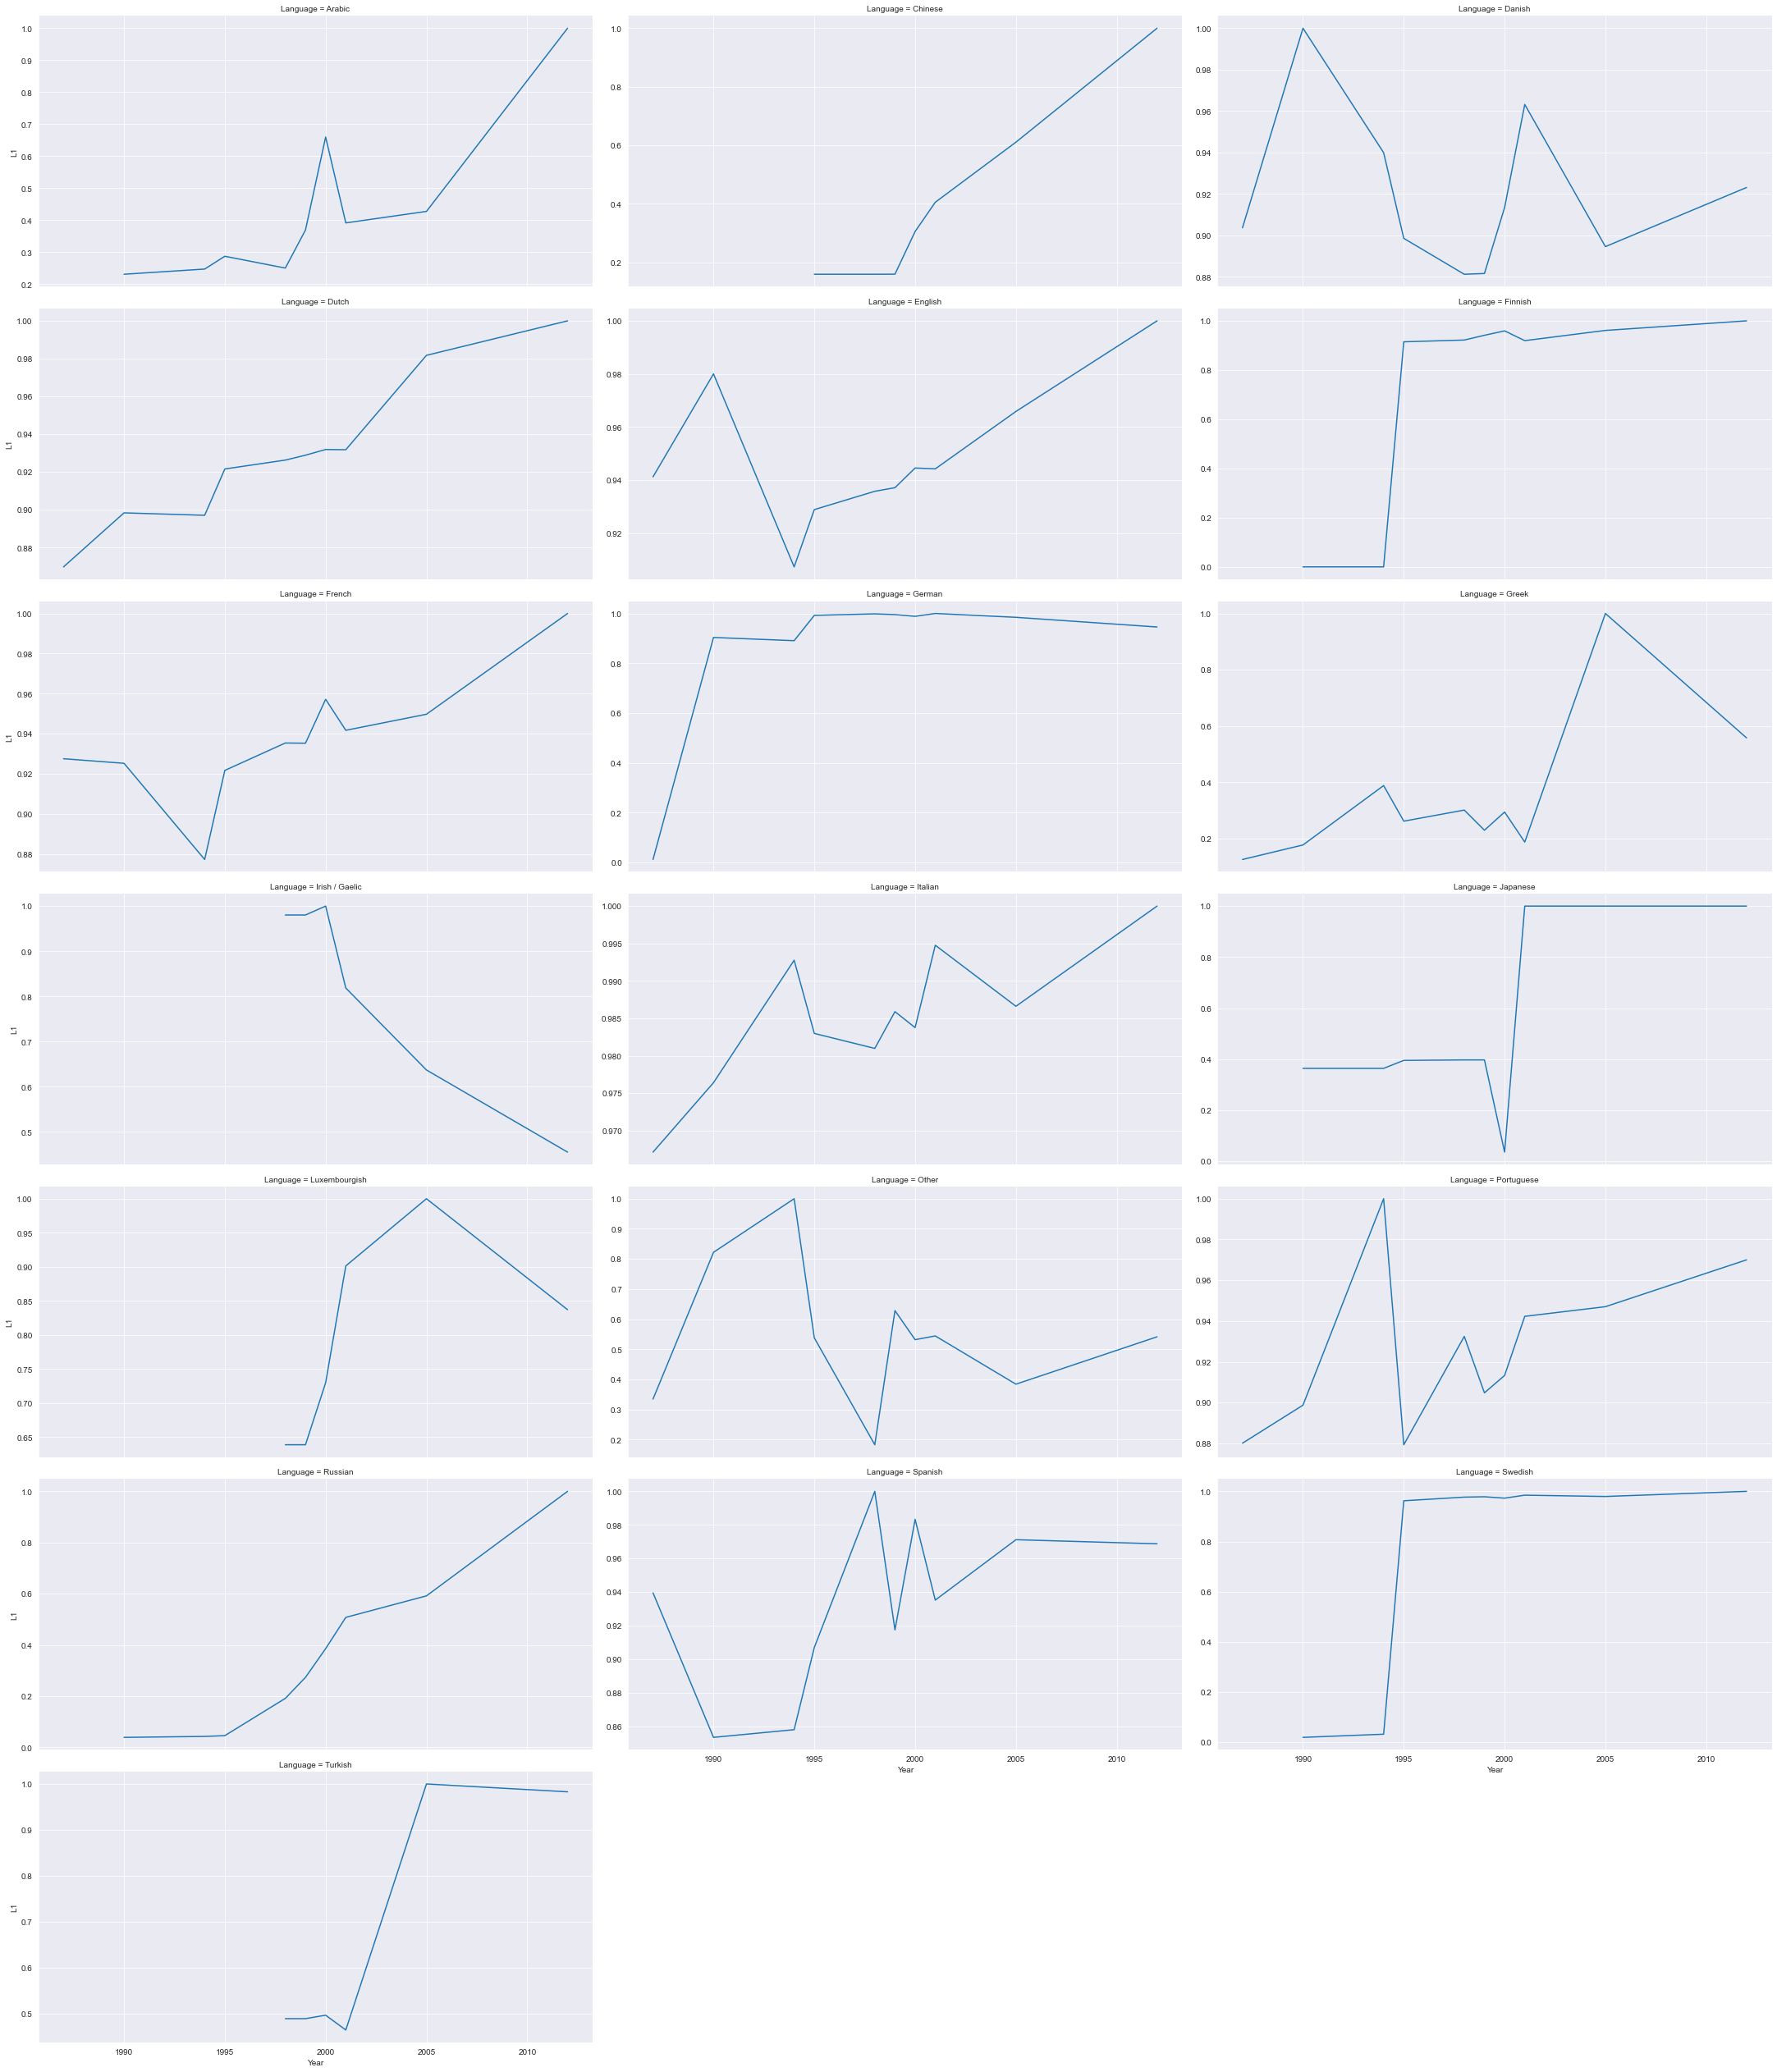

In [27]:
sns.relplot(
    data=m,
    x="Year", y="L1",
    col='Language', col_wrap=3, aspect=2, facet_kws={'sharey':False},
    kind="line", palette=pal[:len(m.Language.unique())]
)

In [28]:
m = normalise(agg, 'L2')
m

,Language,Year,L2
0,Arabic,1987,NaN
1,Arabic,1990,0.329239
2,Arabic,1994,0.329239
3,Arabic,1995,0.348456
4,Arabic,1998,0.466183
...,...,...,...
185,Turkish,1999,0.958148
186,Turkish,2000,0.994357
187,Turkish,2001,0.880518
188,Turkish,2005,0.781203


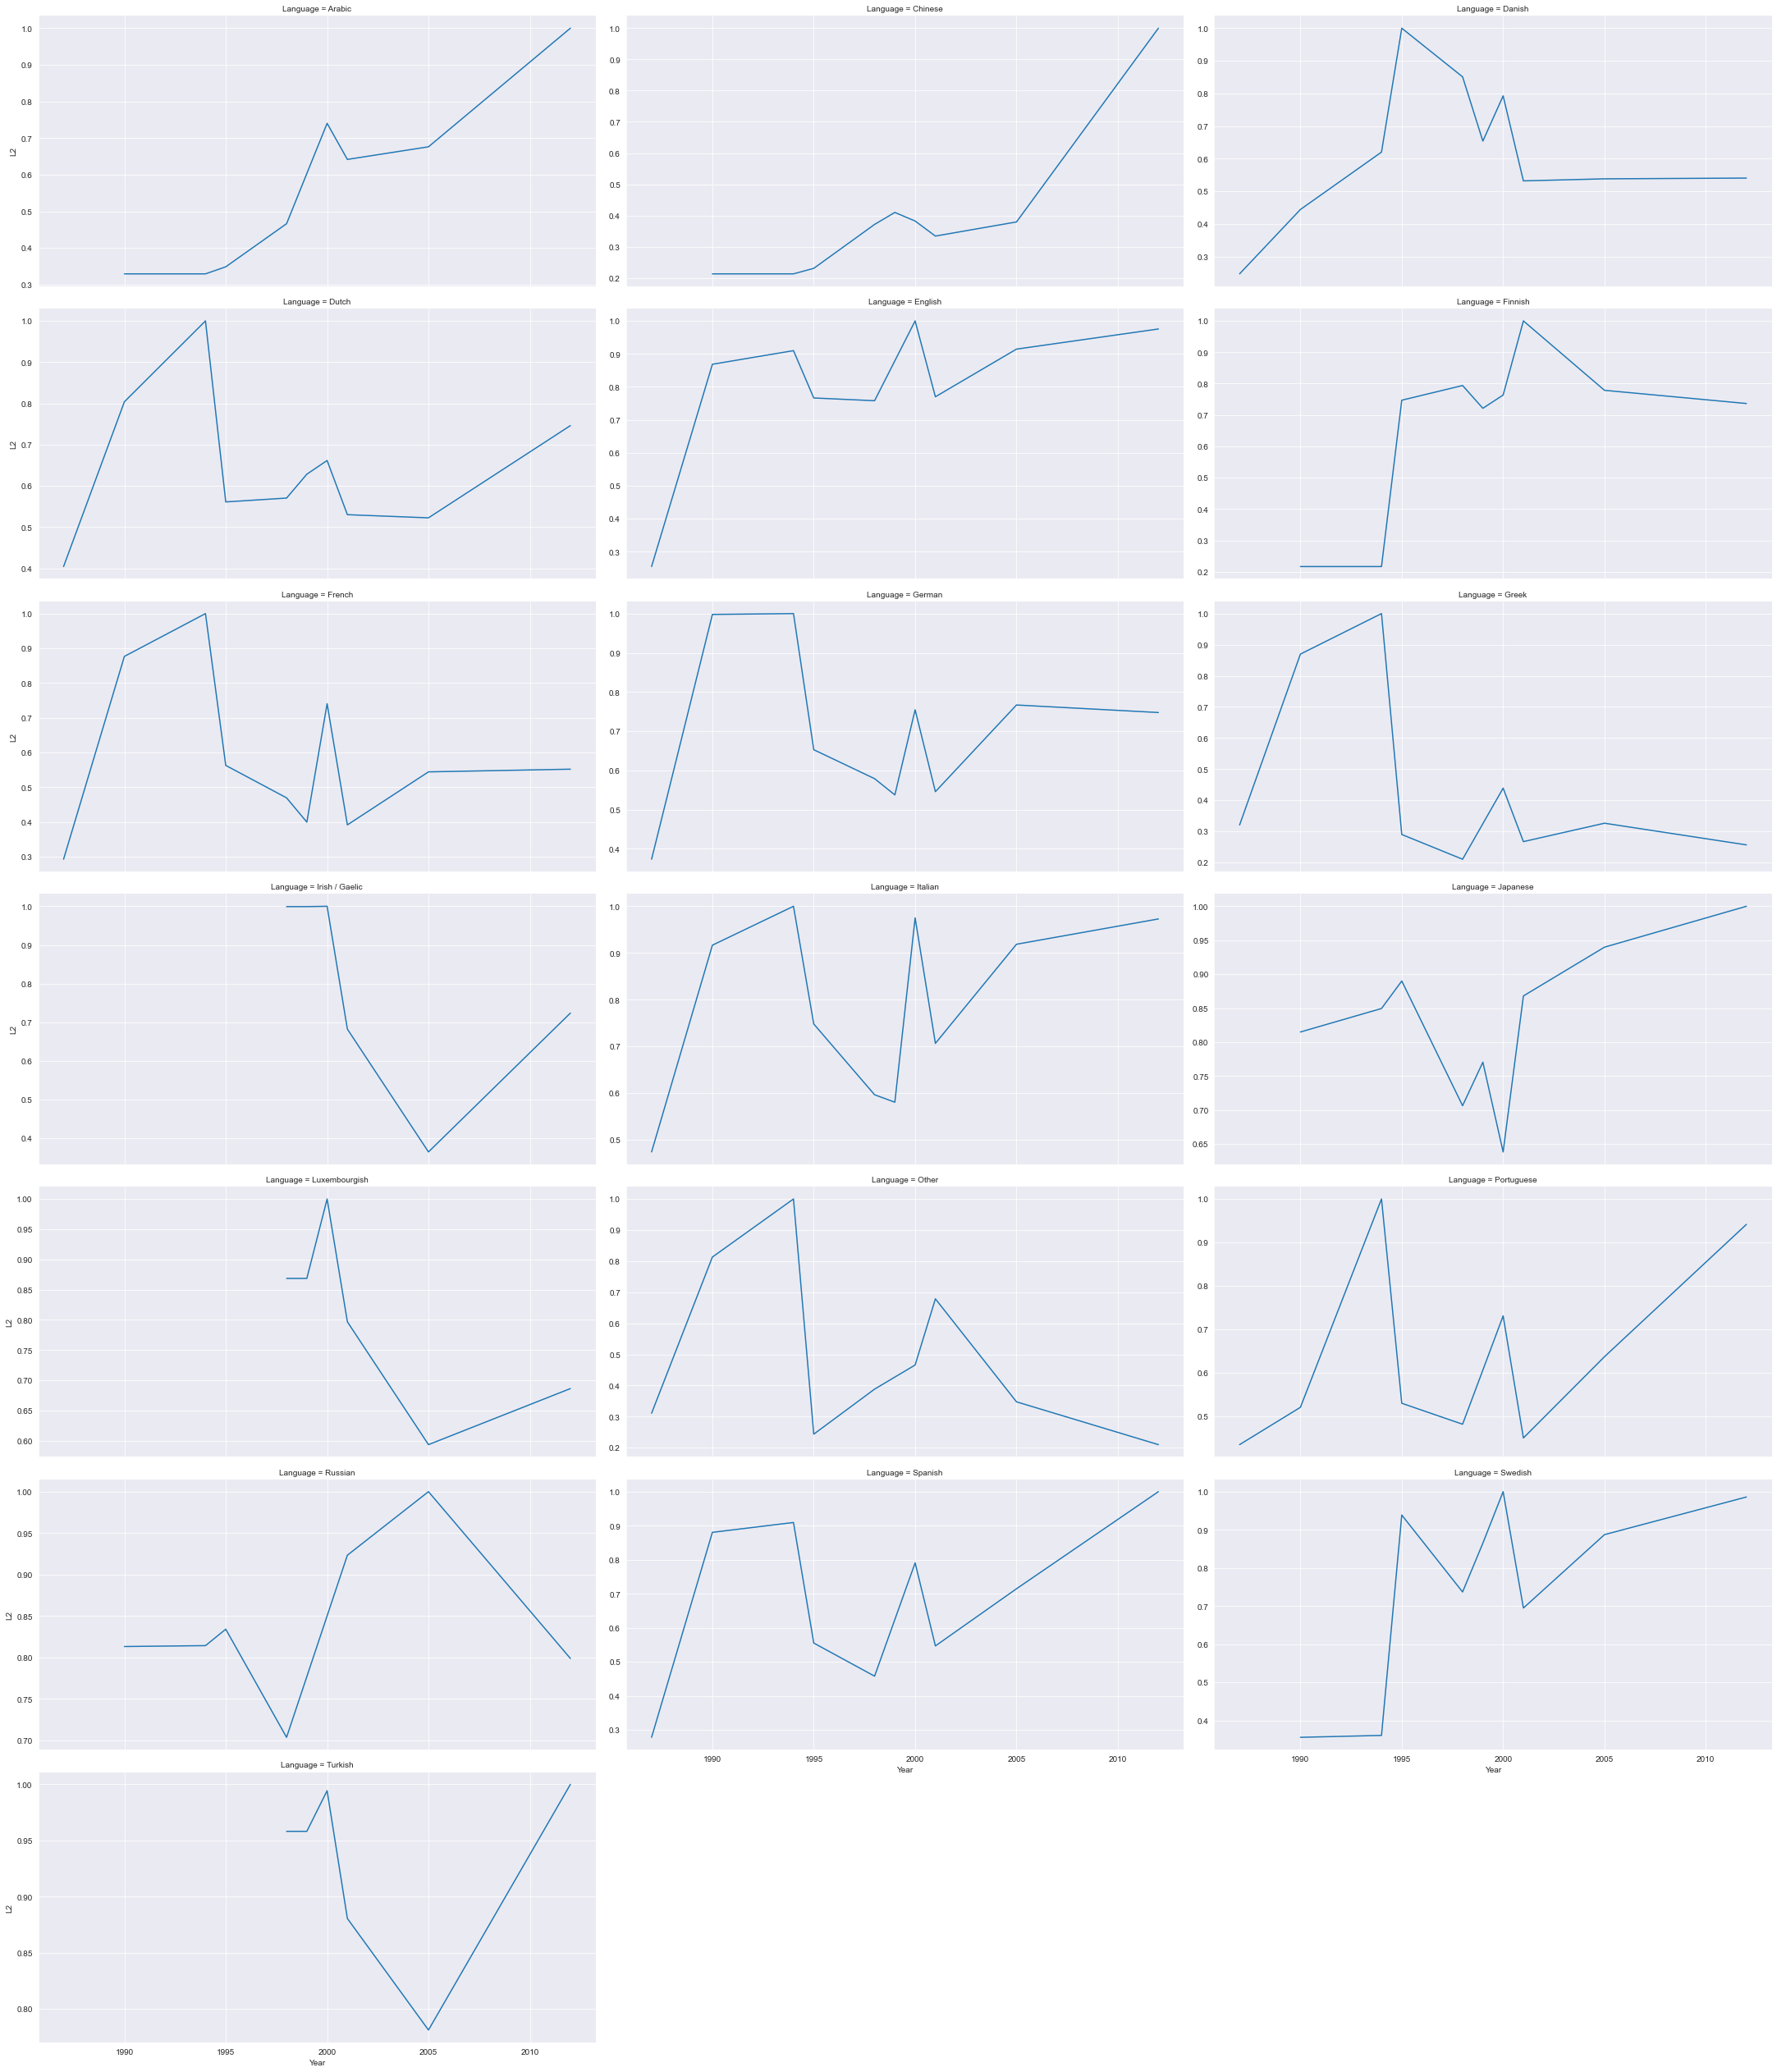

In [29]:
sns.relplot(
    data=m,
    x="Year", y="L2",
    col='Language', col_wrap=3, aspect=2, facet_kws={'sharey':False},
    kind="line", palette=pal[:len(m.Language.unique())]
)